In [64]:
NOTEBOOK_NAME = 'MDS_plots'
data_folder ='/media/data/DATA1/data/odor_ass_learning_2019/results/c3m1/post/data'

#~~~~~~~~~~~~
#A 
#LOAD MODULES
#~~~~~~~~~~~~

# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
from sklearn.covariance import EmpiricalCovariance
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_score as clust_score
from sklearn.preprocessing import StandardScaler
from scipy import stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('/media/data/DATA1/data/odor_ass_learning_2019/code')
sys.path.append('/media/data/DATA1/data/odor_ass_learning_2019/code')

import utils as ut
import plots as pt

from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [65]:
#~~~~~~~~~~~~
#B
#LOAD DATA
#~~~~~~~~~~~~

#a) #NEURONAL SIGNAL (CALCIUM IMAGING RESULT)
traces = np.loadtxt(os.path.join(data_folder, 'C.txt')).T #denoised traces
traces[np.isnan(traces)]=0
traces_raw = np.loadtxt(os.path.join(data_folder, 'C_raw.txt')).T
traces_raw[np.isnan(traces_raw)]=0
areas = ut.load_spatial_footprints_A(os.path.join(data_folder, 'A.txt'))
events = np.loadtxt(os.path.join(data_folder, 'S.txt')).T

# grab time axis from the xml file
import xml.etree.ElementTree as ET
xmlfile = os.path.join(data_folder, 'tseries.xml')
print "I infer the time axis from:\n", xmlfile
tree = ET.parse(xmlfile)
root = tree.getroot()

# unfortunately we miss the first frame
time_ax = np.r_[[child.attrib['absoluteTime']
                 for child in root.iter('Frame')]].astype(float)


#b) #BEHAVIOR CODES
filename = os.path.join(data_folder, 'behavior_codes.txt')
behavior = ut.read_behavior(filename)
events_list = np.unique([b[1] for b in behavior])

I infer the time axis from:
/media/data/DATA1/data/odor_ass_learning_2019/results/c3m1/post/data/tseries.xml


(60, 8520)


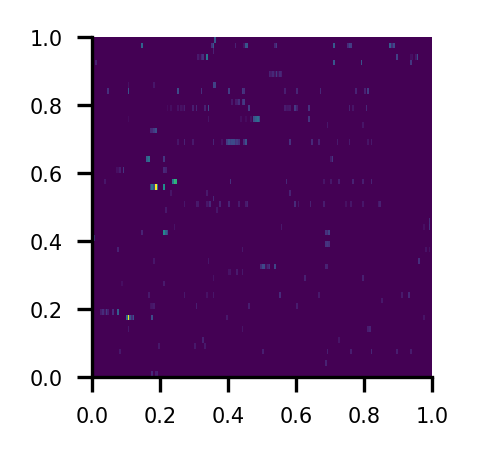

In [6]:
   # Sanity check
print(np.shape(events.T))
fig=pl.figure(1)
pl.imshow(events.T[:,0:200],extent=[0, 1, 0, 1])
#ax.set_xticklabels(xrange(int((t_stop0-t_start0)/delta_t0)))

for i in ut.parse_behavior(behavior, 'BEGIN'):
    if (i/time_ax[8519]*8519)<200:
        pl.plot((i/time_ax[200],i/time_ax[200]),(0,1),'k-')


In [66]:
#c) #SYNC TIMES
start_2p = ut.parse_behavior(behavior, 'BEGIN')[0]
behavior = [[float(b[0])-start_2p, b[1]] for b in behavior]
time_ax -= time_ax[0]

In [67]:
1/(time_ax[1]-time_ax[0])

7.4699140992746038

In [68]:
   # Sanity check
print len(traces)
print len(time_ax)
ratio = int(np.floor(time_ax.shape[0]/traces.shape[0]))
print ratio
behavior

8520
17040
2


[[0.0, 'BEGIN'],
 [8.0, 'TONE_RW'],
 [10.810000000000059, 'LICK'],
 [11.36099999999999, 'LICK'],
 [11.423000000000002, 'LICK'],
 [11.543999999999983, 'LICK'],
 [11.605999999999995, 'LICK'],
 [11.668000000000006, 'LICK'],
 [11.730000000000018, 'LICK'],
 [12.0, 'REWARD'],
 [13.075000000000045, 'LICK'],
 [13.870999999999981, 'LICK'],
 [14.177000000000021, 'LICK'],
 [14.239000000000033, 'LICK'],
 [14.422000000000025, 'LICK'],
 [14.605000000000018, 'LICK'],
 [14.97199999999998, 'LICK'],
 [15.074000000000069, 'LICK'],
 [15.156000000000063, 'LICK'],
 [16.074000000000069, 'LICK'],
 [16.134999999999991, 'LICK'],
 [16.197000000000003, 'LICK'],
 [16.259000000000015, 'LICK'],
 [16.379000000000019, 'LICK'],
 [16.441000000000031, 'LICK'],
 [16.625, 'LICK'],
 [16.686000000000035, 'LICK'],
 [19.0, 'END'],
 [19.807999999999993, 'LICK'],
 [22.991999999999962, 'BEGIN'],
 [30.991999999999962, 'TONE_RW'],
 [33.093000000000075, 'LICK'],
 [33.276000000000067, 'LICK'],
 [33.337999999999965, 'LICK'],
 [33.4610

In [72]:
time_ax = time_ax[::2]
np.where(np.diff(time_ax)>0.5)[0]+1

array([  71,  142,  213,  284,  355,  426,  497,  568,  639,  710,  781,
        852,  923,  994, 1065, 1136, 1207, 1278, 1349, 1420, 1491, 1562,
       1633, 1704, 1775, 1846, 1917, 1988, 2059, 2130, 2201, 2272, 2343,
       2414, 2485, 2556, 2627, 2698, 2769, 2840, 2911, 2982, 3053, 3124,
       3195, 3266, 3337, 3408, 3479, 3550, 3621, 3692, 3763, 3834, 3905,
       3976, 4047, 4118, 4189, 4260, 4331, 4402, 4473, 4544, 4615, 4686,
       4757, 4828, 4899, 4970, 5041, 5112, 5183, 5254, 5325, 5396, 5467,
       5538, 5609, 5680, 5751, 5822, 5893, 5964, 6035, 6106, 6177, 6248,
       6319, 6390, 6461, 6532, 6603, 6674, 6745, 6816, 6887, 6958, 7029,
       7100, 7171, 7242, 7313, 7384, 7455, 7526, 7597, 7668, 7739, 7810,
       7881, 7952, 8023, 8094, 8165, 8236, 8307, 8378, 8449])

In [51]:
np.set_printoptions(threshold=np.inf)
time_ax_txt = open("/media/data/DATA1/data/odor_ass_learning_2019/results/c3m1/pre/data/time_ax.txt","w+")
time_ax_text=np.array2string(time_ax, precision=4, separator='\n')
time_ax_txt.write(time_ax_text[1:-1])
time_ax_txt.close()
np.set_printoptions(threshold=1000)

In [42]:
time_ax_text

'[  0.0000e+00\n  2.6774e-01\n  5.3548e-01\n  8.0322e-01\n  1.0710e+00\n   1.3387e+00\n  1.6064e+00\n  1.8742e+00\n  2.1419e+00\n  2.4097e+00\n   2.6774e+00\n  2.9451e+00\n  3.2129e+00\n  3.4806e+00\n  3.7484e+00\n   4.0161e+00\n  4.2839e+00\n  4.5516e+00\n  4.8193e+00\n  5.0871e+00\n   5.3548e+00\n  5.6226e+00\n  5.8903e+00\n  6.1580e+00\n  6.4258e+00\n   6.6935e+00\n  6.9613e+00\n  7.2290e+00\n  7.4967e+00\n  7.7645e+00\n   8.0322e+00\n  8.3000e+00\n  8.5677e+00\n  8.8354e+00\n  9.1032e+00\n   9.3709e+00\n  9.6387e+00\n  9.9064e+00\n  1.0174e+01\n  1.0442e+01\n   1.0710e+01\n  1.0977e+01\n  1.1245e+01\n  1.1513e+01\n  1.1781e+01\n   1.2048e+01\n  1.2316e+01\n  1.2584e+01\n  1.2852e+01\n  1.3119e+01\n   1.3387e+01\n  1.3655e+01\n  1.3923e+01\n  1.4190e+01\n  1.4458e+01\n   1.4726e+01\n  1.4993e+01\n  1.5261e+01\n  1.5529e+01\n  1.5797e+01\n   1.6064e+01\n  1.6332e+01\n  1.6600e+01\n  1.6868e+01\n  1.7135e+01\n   1.7403e+01\n  1.7671e+01\n  1.7939e+01\n  1.8206e+01\n  1.8474e+01\n   1.

In [73]:
#~~~~~~~~~~~~
#C
#PARSE BEHAVIORS
#~~~~~~~~~~~~

# -----------------------------------------------------------
# these times are relative to the single cycle
# and centered around tone onset
CYCLE_START = -1  # seconds
CS_DURATION = 2  # seconds
DELAY = 2  # seconds
AFTER_DELAY_DURATION = 4  # seconds
US_START = 4
CYCLE_DURATION = abs(CYCLE_START) + CS_DURATION + DELAY + AFTER_DELAY_DURATION

# -----------------------------------------------------------
# these times are absolute times, taken from the arduino file
# when the tones starts and ends
odor_CSm_ons = ut.parse_behavior(behavior, 'TONE_CSM')
odor_CSm_offs = ut.parse_behavior(behavior, 'TONE_CSM', offset=CS_DURATION)
odor_rw_ons = ut.parse_behavior(behavior, 'TONE_RW')
odor_rw_offs = ut.parse_behavior(behavior, 'TONE_RW', offset=CS_DURATION)
rewards = np.r_[ut.parse_behavior(behavior, 'REWARD')]
licks = np.r_[ut.parse_behavior(behavior, 'LICK')]

# -----------------------------------------------------------
# when the experiment starts and ends, in absolute time
cycles_starts = ut.parse_behavior(behavior, '^TONE_*', offset=CYCLE_START) #looks for arduino line that begins w/ either 'R' or 'S'
cycles_ends = ut.parse_behavior(behavior, '^TONE_*', offset=CYCLE_DURATION+CYCLE_START)

cycle_subtract = 0   #do we need to subtract off the last cycle because it's too short???
if cycle_subtract !=0:
    cycles = np.r_[zip(cycles_starts,  # offset will be ADDED, with sign
                   cycles_ends)][:cycle_subtract]
else:
    cycles = np.r_[zip(cycles_starts,  # offset will be ADDED, with sign
                   cycles_ends)]
print 'we are subtracting off this many cycles'
print cycle_subtract


# -----------------------------------------------------------
# absolute time axis with t=0 at CS onset
time_ax_single = ut.extract_single_cycle_time_ax(time_ax, cycles,
                                                 cycle_duration=CYCLE_DURATION, cycle_start=CYCLE_START)

# -----------------------------------------------------------
# which trials are a.p. and which reward
is_rewardt = [any(map(lambda t: (t>=s) and (t<e), odor_rw_ons)) for s, e in zip(cycles_starts, cycles_ends)]
is_CSmt = [any(map(lambda t: (t>=s) and (t<e), odor_CSm_ons)) for s, e in zip(cycles_starts, cycles_ends)]


# -----------------------------------------------------------
# which trials are successfully rewarded
is_rewarded = []
for s, e in cycles:
# s, e = cycles[np.where(is_rewardt)[0][i]]
    try:
        r = rewards[(rewards>=s)*(rewards<e)][0]
        later_licks = licks-r
        is_rewarded.append((np.where((later_licks>=0) * (later_licks<2))[0][0])>0)
    except IndexError:
        is_rewarded.append(False)

we are subtracting off this many cycles
0


In [70]:
# -----------------------------------------------------------
# lick behavior

licks = np.r_[ut.parse_behavior(behavior, 'LICK')]
licks_bs = 1.*ut.compute_licks_during(licks, cycles,
                                      start=-CYCLE_START-DELAY, #2 sec before cycle start
                                      end=-CYCLE_START)  # cycle start
licks_cs = 1.*ut.compute_licks_during(licks, cycles,
                                      start=-CYCLE_START,
                                      end=-CYCLE_START+CS_DURATION)
licks_cs = licks_cs/(CS_DURATION+1)

licks_tc = 1.*ut.compute_licks_during(licks, cycles,
                                      start=-CYCLE_START+CS_DURATION,
                                         end=-CYCLE_START+CS_DURATION+DELAY)
licks_tc = licks_tc/(DELAY+1)

licks_cs_tc = 1.*ut.compute_licks_during(licks, cycles,
                                         start=-CYCLE_START,
                                         end=-CYCLE_START+CS_DURATION+DELAY)
licks_cs_tc = licks_cs_tc/(CS_DURATION+DELAY+1)

licks_tc_us = 1.*ut.compute_licks_during(licks, cycles,
                                         start=-CYCLE_START+CS_DURATION,
                                         end=-CYCLE_START+CS_DURATION+DELAY+AFTER_DELAY_DURATION)
licks_cs_tc_us = 1.*ut.compute_licks_during(licks, cycles,
                                      start=-CYCLE_START,
                                      end=-CYCLE_START+CS_DURATION+DELAY+AFTER_DELAY_DURATION)
lickrates_bs = 1.*licks_bs/(DELAY+AFTER_DELAY_DURATION)
lick_ratios = np.nan_to_num(1.*(licks_tc_us-licks_bs)/(licks_tc_us+licks_bs))
lick_di = np.nan_to_num(1.*(np.mean(licks_tc[is_rewardt]-licks_bs[is_rewardt]) -
                            np.mean(licks_tc[is_CSmt]-licks_bs[is_CSmt]))/np.sqrt(0.5*(np.std(licks_tc)**2+np.std(licks_bs)**2)))
    
good_lick_trials = (licks_bs+licks_tc_us) >= 5

is_errCSmt = (lick_ratios>0.8) * ((licks_tc_us+licks_bs) > 4) * is_CSmt
print is_errCSmt.sum()

is_corrCSmt = ((licks_tc_us)==0) * is_CSmt
print is_corrCSmt.sum()
print licks_cs
licks

0
60
[ 0.          0.          0.          0.          0.          0.
  0.33333333  1.66666667  0.          0.          0.          0.          0.
  0.33333333  0.          1.          0.          0.          0.
  0.66666667  0.          0.          0.          0.          0.
  0.66666667  0.          0.33333333  0.          0.          0.33333333
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.66666667  0.
  0.66666667  0.          0.          0.66666667  0.          0.66666667
  0.          2.33333333  0.          1.33333333  0.          0.          0.
  0.          0.          0.          0.          0.          1.
  0.66666667  0.          0.          0.          0.          0.          0.
  0.33333333  0.          0.          0.          0.          0.33333333
  0.          0.          0.          0.          0.          0.          0.
  0.          0.66666667  0.          0.          0.          0.  

/home/fabios/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in divide


array([   10.81 ,    11.361,    11.423,    11.544,    11.606,    11.668,
          11.73 ,    13.075,    13.871,    14.177,    14.239,    14.422,
          14.605,    14.972,    15.074,    15.156,    16.074,    16.135,
          16.197,    16.259,    16.379,    16.441,    16.625,    16.686,
          19.808,    33.093,    33.276,    33.338,    33.461,    33.522,
          33.644,    33.706,    34.012,    34.073,    34.378,    34.44 ,
          34.502,    34.623,    35.174,    75.519,    75.702,    76.069,
          76.253,    76.376,    76.437,    76.559,    76.865,    76.927,
          77.048,    77.11 ,    78.028,    78.457,    78.518,   144.757,
         145.125,   145.186,   145.37 ,   145.921,   146.042,   146.104,
         146.961,   147.022,   147.818,   148.123,   148.185,   148.247,
         168.509,   168.815,   168.877,   168.939,   169.305,   169.795,
         169.856,   169.978,   170.162,   170.224,   170.406,   170.468,
         170.53 ,   171.08 ,   171.448,   172.121, 

In [54]:
np.set_printoptions(threshold=np.inf)
time_ax_txt = open("/media/data/DATA1/data/odor_ass_learning_2019/results/c3m1/pre/data/licks.txt","w+")
time_ax_text=np.array2string(licks, precision=4, separator='\n')
time_ax_txt.write(time_ax_text[1:-1])
time_ax_txt.close()
np.set_printoptions(threshold=1000)

In [74]:
#~~~~~~~~~~~~
#E
#PARSE NEURAL ACTIVITY INTO MATRIX
#~~~~~~~~~~~~

delta_t0 = 0.27 # >=0.26 sec
t_start0 = -2  # sec
#t_start0 = 2  # sec
t_stop0 = 6  # sec

# Shape of the following is (N_time_bins, N_trials, N_cells)
patterns_tb = np.r_[[ut.extract_activity(time_ax, events, cycles, CYCLE_START, i*delta_t0, (i+1)*delta_t0,
                                      offset=t_start0)
                     for i in xrange(int((t_stop0-t_start0)/delta_t0))]]

patterns_tb[np.isnan(patterns_tb)]=0

neuron_num=np.shape(patterns_tb)[2]

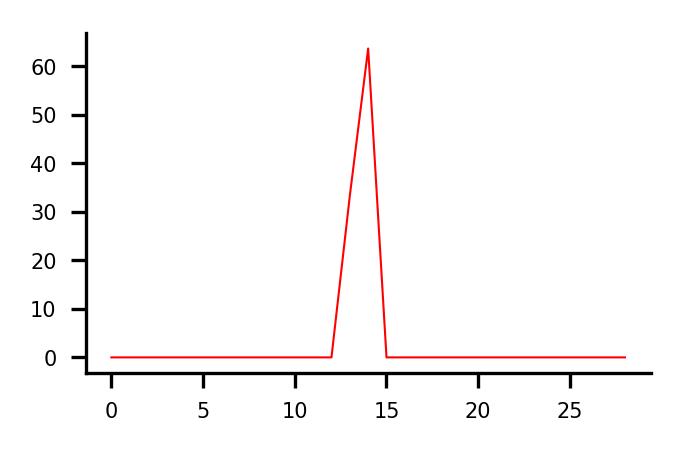

In [75]:
 # Sanity check, skip in normal analysis
patterns_tb_debug = np.r_[[ut.extract_activity(time_ax, events, cycles[1:2,:], CYCLE_START, i*delta_t0, (i+1)*delta_t0,
                                      offset=t_start0)
                     for i in xrange(int((t_stop0-t_start0)/delta_t0))]]
test=patterns_tb_debug[:,0,1].T;
fig = pl.figure(1)
pl.plot(xrange(int((t_stop0-t_start0)/delta_t0)),np.squeeze(test)*10,'r')
pl.show()

In [76]:
#~~~~~~~~~~~~
#
#PREPARING FOR DATA ANALYSIS
#~~~~~~~~~~~~
normalize_flag=False
if normalize_flag:
    data_rewardt=patterns_tb_normalized[:,is_rewardt,:]
    data_CSmt=patterns_tb_normalized[:,is_CSmt,:]
else:
    data_rewardt=patterns_tb[:,is_rewardt,:] #(N_time_bins, N_trials, N_cells)
    data_CSmt=patterns_tb[:,is_CSmt,:] #(N_time_bins, N_trials, N_cells)

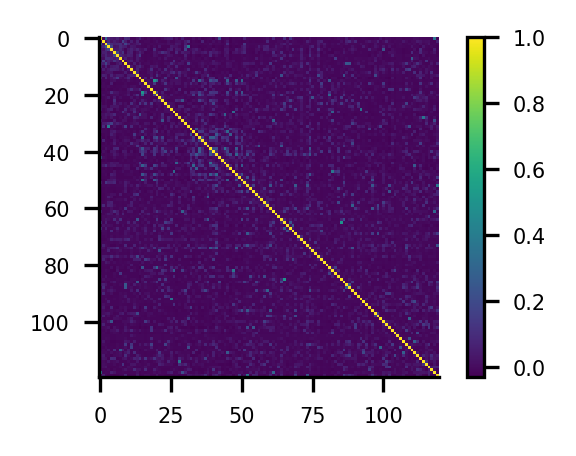

In [91]:
data_rewardt_cat=data_rewardt[:,:,0]
data_CSmt_cat=data_CSmt[:,:,0]
for i in range(1,neuron_num):
    data_rewardt_cat=np.concatenate((data_rewardt_cat,data_rewardt[:,:,i]),axis=0)
    data_CSmt_cat=np.concatenate((data_CSmt_cat,data_CSmt[:,:,i]),axis=0)
    
data_rewardt_corr=np.corrcoef(np.r_[data_rewardt_cat.T,data_CSmt_cat.T])
fig = pl.figure(1)
pl.imshow(data_rewardt_corr)
cbar = pl.colorbar()

array([15, 19, 20, 33, 35, 36, 39, 40, 41, 45, 48, 50, 74, 81])

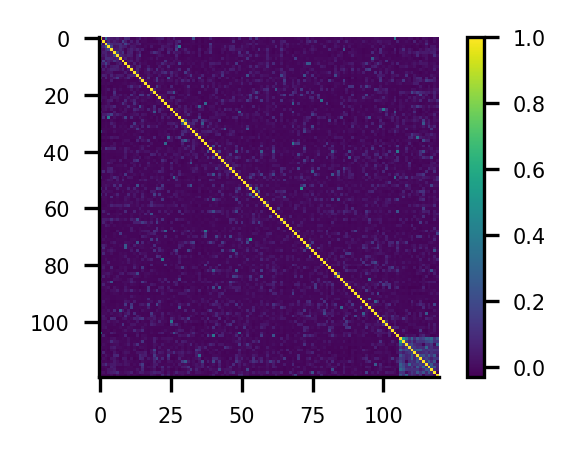

In [95]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='complete').fit(data_rewardt_corr)
sort_ind=np.concatenate((np.argwhere(clustering.labels_==0).T[0],np.argwhere(clustering.labels_==1).T[0]),axis=0)
data_rewardt_corr_sort=data_rewardt_corr[sort_ind,:]
data_rewardt_corr_sort=data_rewardt_corr_sort[:,sort_ind]
fig = pl.figure(1)
pl.imshow(data_rewardt_corr_sort)
cbar = pl.colorbar()
np.argwhere(clustering.labels_==1).T[0]

In [85]:
trial_i=1
raster_rewardt=np.concatenate([np.reshape(data_rewardt[:,trial_i,neuron_i].T,(1,np.shape(data_rewardt)[0])) for neuron_i in np.arange(0,20)],axis=0)
raster_CSmt=np.concatenate([data_CSmt[:,trial_i,neuron_i].T for neuron_i in np.arange(0,20)],axis=0)

dist_rewardt_all=np.corrcoef(raster_rewardt)
dist_CSmt_all=np.corrcoef(raster_CSmt)


In [89]:
np.shape(data_rewardt_cat)

(1740, 60)

In [60]:
from seqnmf import seqnmf, plot, example_data

[W, H, cost, loadings, power] = seqnmf(example_data, K=20, L=100, Lambda=0.001, plot_it=True)

plot(W, H).show()

SyntaxError: invalid syntax (seqnmf.py, line 146)

In [81]:
#np.shape(data_rewardt_corr[sort_ind,:])
neuron_ind=35,0,3,8,24,28,30,31,5,19,41,57,14,29,13,21,23,34,36,38,39,40,53,58,6,55,2,33,50,27,37,32,47,56,7,48,49,51,54,1,22,46,10,16,26,43,59,11,9,17,45,15,20,52,25,4,18,42,12,44

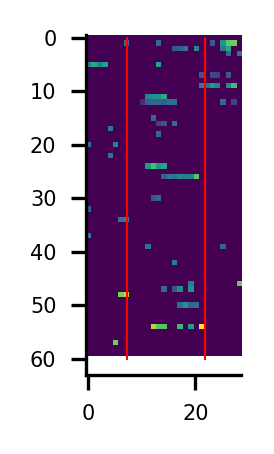

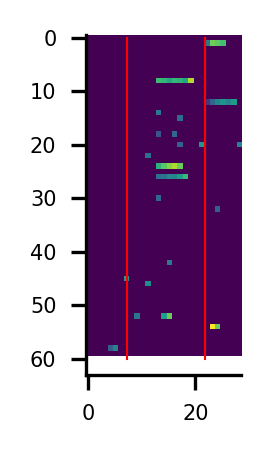

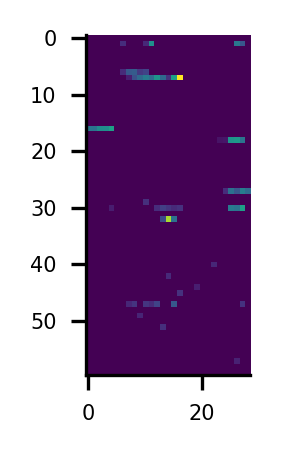

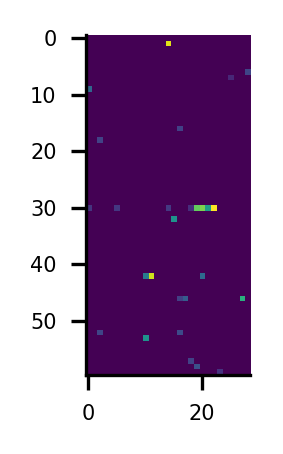

In [102]:
trial_1=40
trial_2=45

fig = pl.figure(1)
data_1=np.sqrt(np.divide(data_rewardt[:,trial_1,neuron_ind].T,np.amax(events.T,axis=1,keepdims=1)))
#data_1=data_rewardt[:,trial_1,neuron_ind].T
pl.imshow(data_1)
pl.plot((float(-t_start0)/(-t_start0+t_stop0)*np.shape(data_rewardt)[0],float(-t_start0)/(-t_start0+t_stop0)*np.shape(data_rewardt)[0]),(0,np.shape(data_rewardt)[2]),'r-')
pl.plot((float(-t_start0+4)/(-t_start0+t_stop0)*np.shape(data_rewardt)[0],float(-t_start0+4)/(-t_start0+t_stop0)*np.shape(data_rewardt)[0]),(0,np.shape(data_rewardt)[2]),'r-')

fig = pl.figure(2)
data_2=np.sqrt(np.divide(data_rewardt[:,trial_2,neuron_ind].T,np.amax(events.T,axis=1,keepdims=1)))
#data_2=data_rewardt[:,trial_2,neuron_ind].T
pl.imshow(data_2)
pl.plot((float(-t_start0)/(-t_start0+t_stop0)*np.shape(data_rewardt)[0],float(-t_start0)/(-t_start0+t_stop0)*np.shape(data_rewardt)[0]),(0,np.shape(data_rewardt)[2]),'r-')
pl.plot((float(-t_start0+4)/(-t_start0+t_stop0)*np.shape(data_rewardt)[0],float(-t_start0+4)/(-t_start0+t_stop0)*np.shape(data_rewardt)[0]),(0,np.shape(data_rewardt)[2]),'r-')


fig = pl.figure(3)
pl.imshow(data_CSmt[:,42,:].T)
fig = pl.figure(4)
pl.imshow(data_CSmt[:,41,:].T)

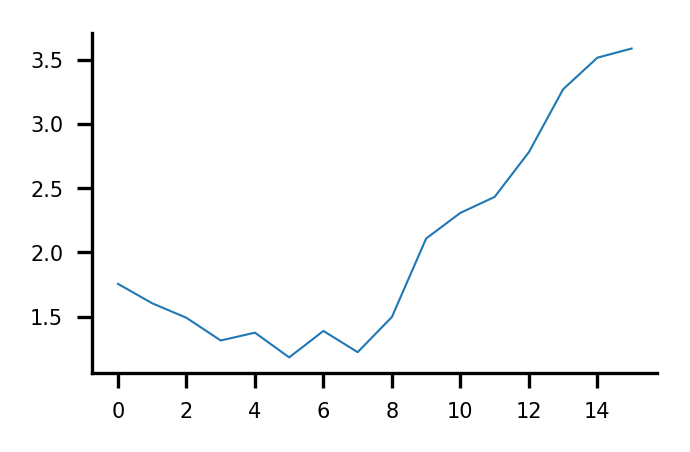

In [1585]:
fig = pl.figure(1)
pl.plot(np.mean(data_rewardt[:,:,5].T,axis=0))

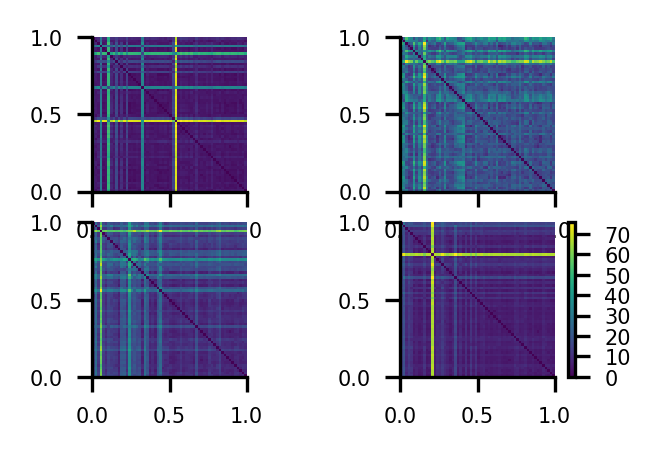

In [1587]:
# POINT 1: SINGLE TRIAL DATA CAN LOOK VERY DIFFERENT FOR EACH TRIAL
#          The two on the first row are distance matrices for two trials
#          The two on the lower are average across trials

fig = pl.figure(1)
#for i in range(np.shape(data_rewardt)[1]):
pl.subplot(221)
pl.imshow(dist_rewardt[56], extent=[0, 1, 0, 1])
pl.subplot(222)
pl.imshow(dist_rewardt[58], extent=[0, 1, 0, 1])
pl.subplot(223)
pl.imshow(np.mean(dist_rewardt[0:9],axis=0), extent=[0, 1, 0, 1])
pl.subplot(224)
pl.imshow(np.mean(dist_CSmt[0:9],axis=0), extent=[0, 1, 0, 1])
pl.colorbar()
    #pos_rewardt = mds.fit(dist_rewardt[i]).embedding_
    #pos_CSmt = mds.fit(dist_CSmt[i]).embedding_
    
    #pl.scatter(pos_rewardt[:, 0], pos_rewardt[:, 1],color='r', lw=0, label='reward')
    #pl.scatter(pos_CSmt[:, 0], pos_CSmt[:, 1],color='k', lw=0, label='CSm')

pl.show()
#dist_CSmt=np.mean(dist_CSmt,axis=0)


[-0.1557956   0.0172654   0.23162383  0.29532807  0.23239928  0.01697035
  0.03944741  0.33841943  0.04805377  0.10748625  0.109815   -0.00588452
 -0.09769614 -0.12092047  0.19542355 -0.12908522]
[ 0.22309867  0.34425603  0.44473208  0.47375778  0.31908073  0.13270701
  0.2147667   0.38564605  0.03984688  0.24787354  0.16730408  0.14905357
 -0.09716777 -0.07949102  0.29723177 -0.07487864]


In [1802]:
import scipy.stats
for neuron_ind in np.arange(0,neuron_num):
    print('Neuron Number '+str(neuron_ind))
    data_rewardt_neuron=data_rewardt[:,:,neuron_ind].T
    data_CSmt_neuron=data_CSmt[:,:,neuron_ind].T
    np.linalg.norm(data_rewardt_neuron-np.mean(data_rewardt_neuron,axis=0),axis=0)
    
    mean_rewardt_neuron=scipy.stats.trim_mean(data_rewardt_neuron,0.25,axis=0)
    mean_CSmt_neuron=scipy.stats.trim_mean(data_CSmt_neuron,0.25,axis=0)
    mean_all_neuron=scipy.stats.trim_mean(np.r_[data_rewardt_neuron,data_CSmt_neuron],0.25,axis=0)
    
    ind_close_rewardt=np.argsort(np.linalg.norm(data_rewardt_neuron-mean_rewardt_neuron,axis=1))[0:20]
    ind_close_CSmt=np.argsort(np.linalg.norm(data_CSmt_neuron-mean_CSmt_neuron,axis=1))[0:20]
    
    s_rewardt=np.mean(np.var(data_rewardt_neuron-mean_rewardt_neuron,axis=0))
    s_CSmt=np.mean(np.var(data_CSmt_neuron-mean_CSmt_neuron,axis=0))
    mean_diff=np.linalg.norm(mean_rewardt_neuron-mean_CSmt_neuron)
    
    scatter_index=mean_diff/(s_rewardt+s_CSmt)
    print('Scatter Index: '+str(scatter_index))

Neuron Number 0
Scatter Index: 0.00166510303802
Neuron Number 1
Scatter Index: 0.0866816553222
Neuron Number 2
Scatter Index: 0.00923865770197
Neuron Number 3
Scatter Index: 0.0312859675908
Neuron Number 4
Scatter Index: 0.0204018885771
Neuron Number 5
Scatter Index: 0.0465964507137
Neuron Number 6
Scatter Index: 0.0157173271664
Neuron Number 7
Scatter Index: 0.00564607836343
Neuron Number 8
Scatter Index: 0.0179558486368
Neuron Number 9
Scatter Index: 0.0439394707889
Neuron Number 10
Scatter Index: 0.0569788639724
Neuron Number 11
Scatter Index: 0.0351832106496
Neuron Number 12
Scatter Index: 0.0161958189242
Neuron Number 13
Scatter Index: 0.0405474860712
Neuron Number 14
Scatter Index: 0.0234877802097
Neuron Number 15
Scatter Index: 0.0972718004646
Neuron Number 16
Scatter Index: 0.0508446469949
Neuron Number 17
Scatter Index: 0.0188766571923
Neuron Number 18
Scatter Index: 0.0215215164383
Neuron Number 19
Scatter Index: 0.0179099474187
Neuron Number 20
Scatter Index: 0.025927439819


In [1838]:
# POINT 1 (cont.): BUT CLUSTERING ARE VERY CLEAR IN INDIVIDUAL NEURONS ACROSS TRIALS

#~~~~~~~~~~~~
#G
#MDS PLOTS and DECODING VALANCE
#~~~~~~~~~~~~

from mpl_toolkits import mplot3d
%matplotlib inline
from sklearn.metrics import euclidean_distances
from sklearn import manifold

dist_rewardt=[euclidean_distances(data_rewardt[:,i,:].T) for i in range(np.shape(data_rewardt)[1])]
dist_CSmt=[euclidean_distances(data_CSmt[:,i,:].T) for i in range(np.shape(data_CSmt)[1])]

mds = manifold.MDS(n_components=3, max_iter=3000, eps=1e-9, random_state=np.random.RandomState(seed=3),
                   dissimilarity="precomputed", n_jobs=1)

neuron_ind=51
data_rewardt_neuron=data_rewardt[:,:,neuron_ind].T
data_CSmt_neuron=data_CSmt[:,:,neuron_ind].T
dist_neuron=euclidean_distances(np.r_[data_rewardt_neuron,data_CSmt_neuron])
print(np.shape(dist_neuron))

pos_neuron = mds.fit(dist_neuron).embedding_
pos_rewardt_neuron=pos_neuron[0:np.shape(data_rewardt_neuron)[0],:]
pos_CSmt_neuron =pos_neuron[np.shape(data_rewardt_neuron)[0]:,:]

#fig = pl.figure(1)
#for i in range(np.shape(data_rewardt)[1]):
#pl.subplot(121)
#pl.imshow(dist_rewardt_neuron, extent=[0, 1, 0, 1])
#pl.subplot(122)
#pl.imshow(dist_CSmt_neuron, extent=[0, 1, 0, 1])
#pl.show()

(120, 120)


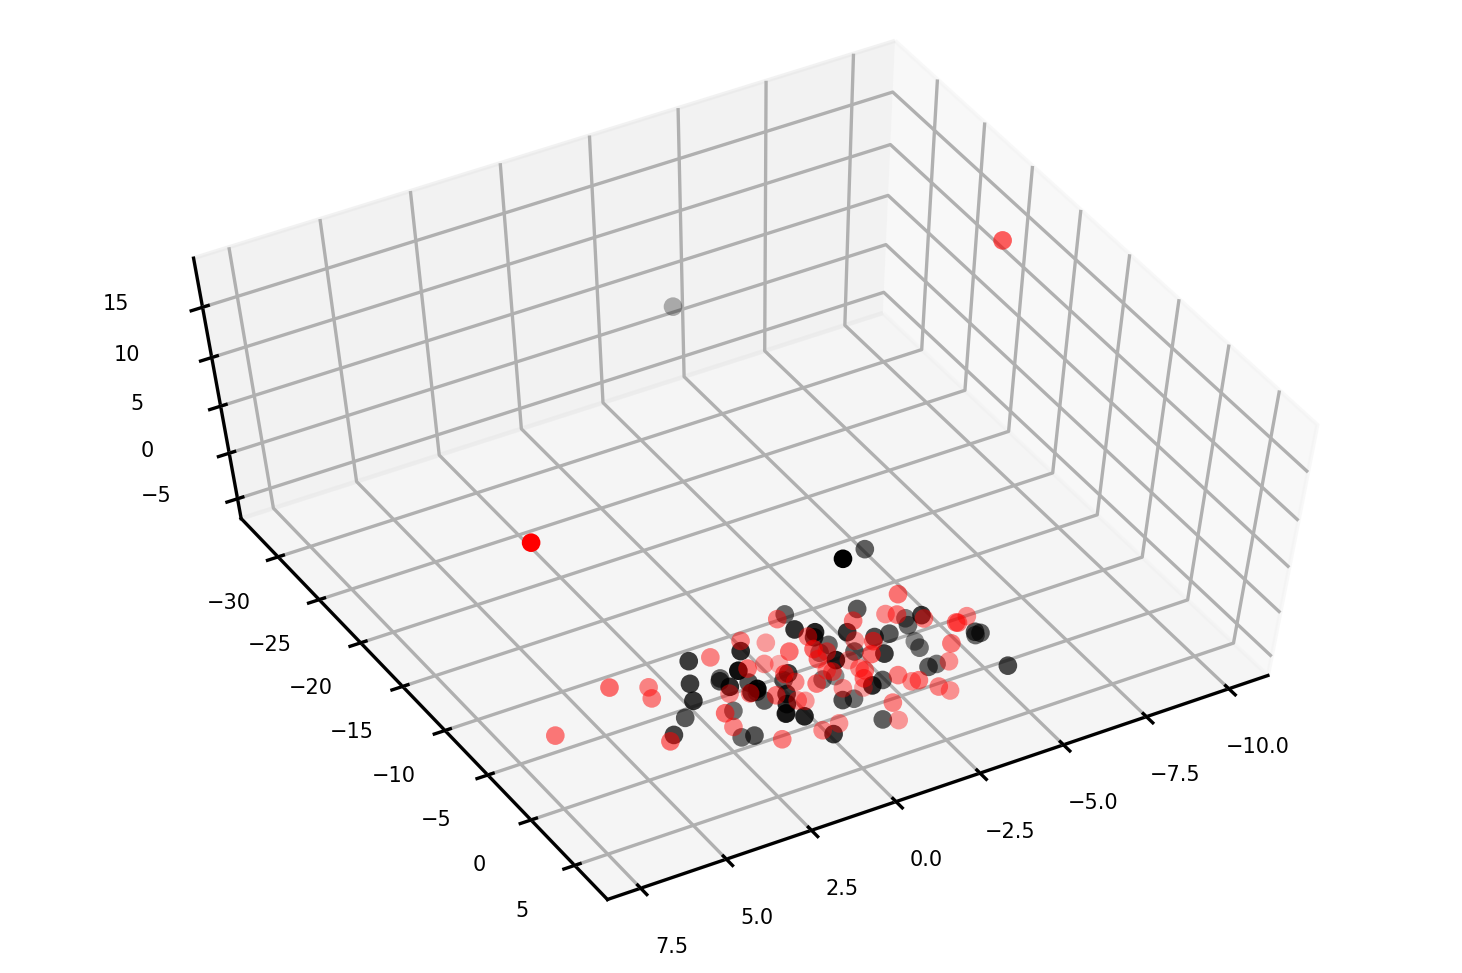

Scatter Index: 0.0105529238587
Neuron Number 51
0.625


In [1840]:
fig = pl.figure(2)
ax = pl.axes(projection='3d')
ax.scatter3D(pos_rewardt_neuron[:, 0], pos_rewardt_neuron[:, 1], pos_rewardt_neuron[:, 2],color='r', lw=0, label='reward')
ax.scatter3D(pos_CSmt_neuron[:, 0], pos_CSmt_neuron[:, 1], pos_CSmt_neuron[:, 2],color='k', lw=0, label='CSm')
ax.view_init(60,60)
pl.show()

#
s_rewardt=np.sum(np.var(data_rewardt_neuron,axis=0))
s_CSmt=np.sum(np.var(data_CSmt_neuron,axis=0))
mean_diff=np.linalg.norm(np.mean(data_rewardt_neuron,axis=0)-np.mean(data_CSmt_neuron,axis=0))
scatter_index=mean_diff*mean_diff/(s_rewardt+s_CSmt)
print('Scatter Index: '+str(scatter_index))

#from sklearn.svm import LinearSVC
#decodor = LinearSVC()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
decoder=LinearDiscriminantAnalysis()

from sklearn.model_selection import cross_val_score

trial_num=np.shape(data_rewardt_neuron)[0]

score=cross_val_score(decodor,np.r_[data_rewardt_neuron,data_CSmt_neuron],np.r_[np.ones(trial_num),np.zeros(trial_num)], cv=5)
print('Neuron Number '+str(neuron_ind))
print(np.max(score))

In [1758]:
# POINT 1 (cont.): DISTANCE MATRIX CAN LOOK VERY DIFFERENT FOR EACH TRIAL
#          BUT CLUSTERING ARE VERY CLEAR IN INDIVIDUAL TRIALS
#          This is more clearly shown by
#          decoding with LINEAR SVM or LDA

from sklearn.svm import LinearSVC
decodor = LinearSVC()
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#decoder=LinearDiscriminantAnalysis()

from sklearn.model_selection import cross_val_score
scores = []

for i in range(np.shape(patterns_tb)[1]/2):
    train_rewardt=data_rewardt[:,i,:].T
    train_CSmt=data_CSmt[:,i,:].T
    scores.append(cross_val_score(decodor,np.r_[train_rewardt,train_CSmt],np.r_[np.ones(neuron_num),np.zeros(neuron_num)], cv=5))
scores = np.r_[scores]

scores_ave = []
for i in range(6):
    #for every ten trials
    ind=range(i*10,i*10+10,1)
    train_rewardt=np.mean(data_rewardt[:,ind,:],axis=1).T
    train_CSmt=np.mean(data_CSmt[:,ind,:],axis=1).T
    scores_ave.append(cross_val_score(decodor,np.r_[train_rewardt,train_CSmt],np.r_[np.ones(neuron_num),np.zeros(neuron_num)], cv=5))
scores_ave = np.r_[scores_ave]

In [1826]:
# Average across trials
rewardt_mean=np.mean(data_rewardt[:,:,:],axis=1).T
CSmt_mean=np.mean(data_CSmt[:,:,:],axis=1).T

dist_mean=euclidean_distances(np.r_[rewardt_mean,CSmt_mean])

pos_mean=mds.fit(dist_mean).embedding_   

pos_rewardt = dist_mean[0:np.shape(rewardt_mean)[0],:]
pos_CSmt = dist_mean[np.shape(rewardt_mean)[0]:,:]

# However, sometimes within a single trial, neurons can be seperated
rewardt_single=data_rewardt[:,50,:].T
CSmt_single=data_CSmt[:,50,:].T
dist_rewardt_single=euclidean_distances(rewardt_single)
dist_CSmt_single=euclidean_distances(CSmt_single)

pos_rewardt_single = mds.fit(dist_rewardt_single).embedding_
pos_CSmt_single = mds.fit(dist_CSmt_single).embedding_

Scatter Index: 0.00149635495537


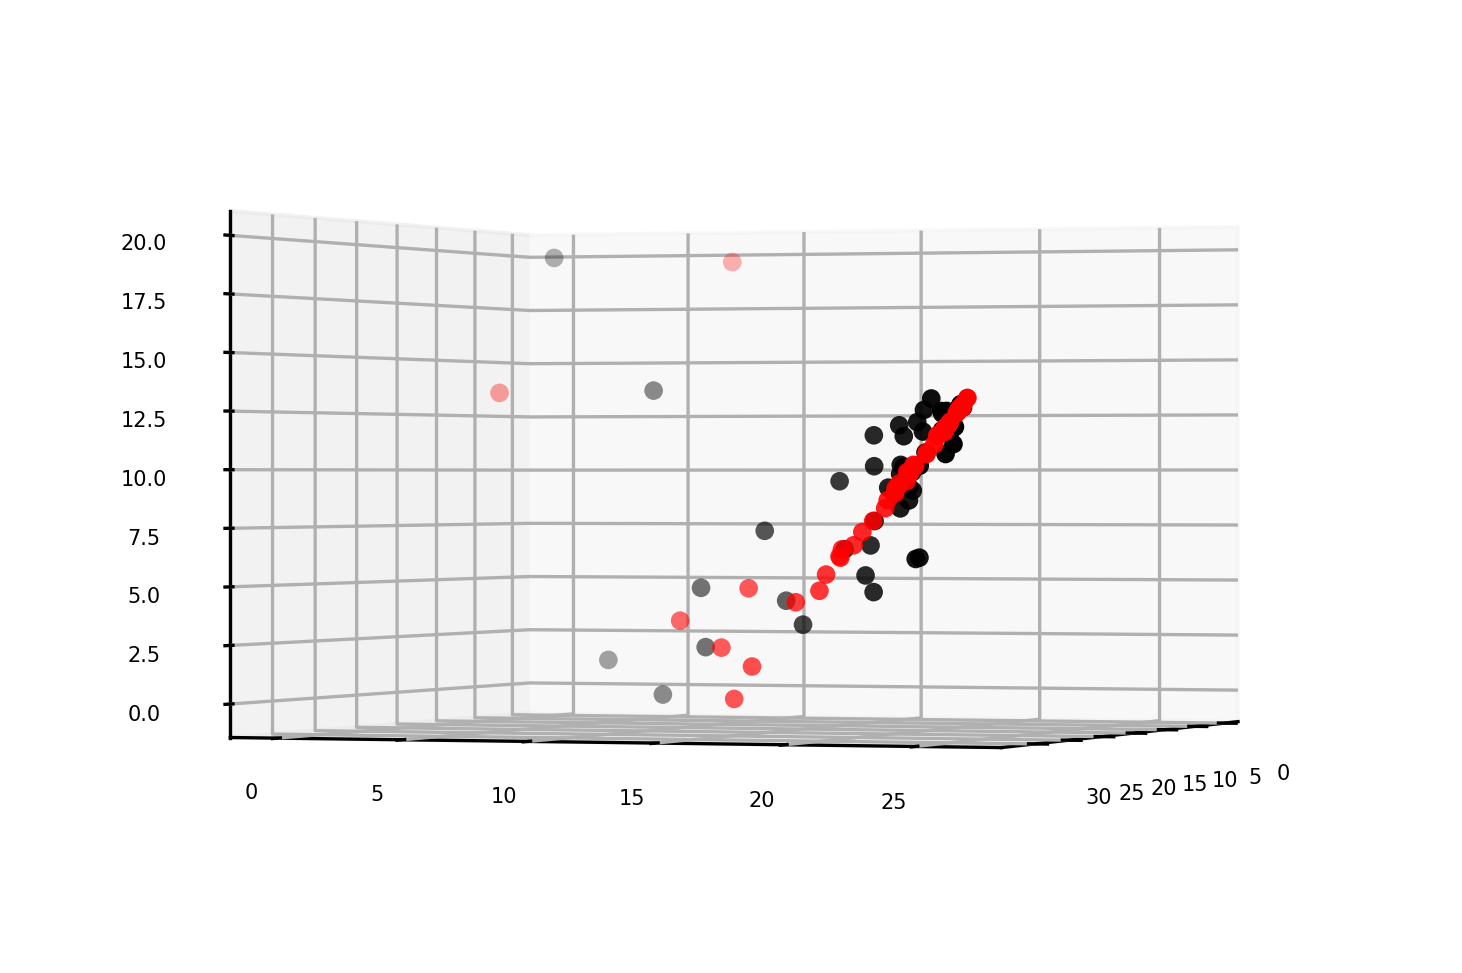

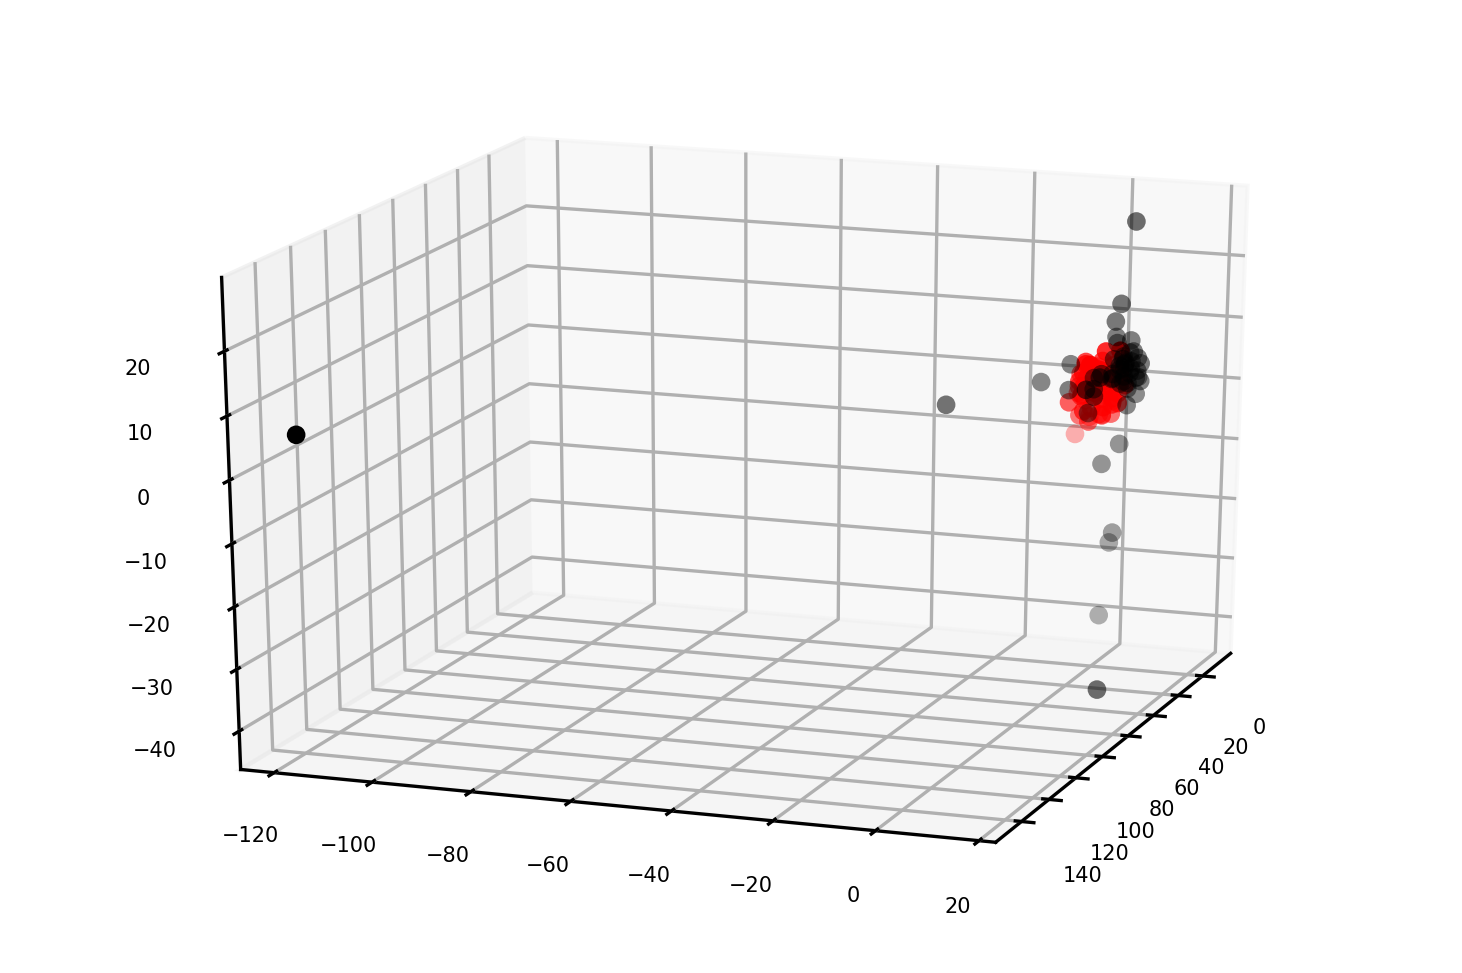

In [1833]:
s_rewardt=np.sum(np.var(rewardt_mean,axis=0))
s_CSmt=np.sum(np.var(CSmt_mean,axis=0))
mean_diff=np.linalg.norm(np.mean(rewardt_mean,axis=0)-np.mean(CSmt_mean,axis=0))
scatter_index=mean_diff*mean_diff/(s_rewardt+s_CSmt)
print('Scatter Index: '+str(scatter_index))
    
fig = pl.figure(2)
pl.subplot(1,2,1)
ax = pl.axes(projection='3d')
ax.scatter3D(pos_rewardt[:, 0], pos_rewardt[:, 1], pos_rewardt[:, 2],color='r', lw=0, label='reward')
ax.scatter3D(pos_CSmt[:, 0], pos_CSmt[:, 1], pos_rewardt[:, 2],color='k', lw=0, label='CSm')
ax.view_init(0,20)
pl.show()

pl.subplot(1,2,2)
ax = pl.axes(projection='3d')
#ax.scatter3D(pos_rewardt_single[:, 0], pos_rewardt_single[:, 1], pos_rewardt_single[:, 2],color='r', lw=0, label='reward')

ax.scatter3D(pos_CSmt_single[:, 0], pos_CSmt_single[:, 1], pos_rewardt_single[:, 2],color='k', lw=0, label='CSm')
ax.scatter3D(pos_CSmt_first[:, 0], pos_CSmt_first[:, 1], pos_CSmt_first[:, 2],color='r', lw=0, label='reward')
ax.view_init(20,20)
pl.show()

In [1746]:
score_plot=np.amax(scores,axis=1)
score_ave_plot=np.amax(scores_ave,axis=1)

[ 1 13  0 42  4 44 15 10 59  3  2 11 12 41 24 36 39 50 21 29 17 56  6 30 18
 55  5 40  7 32 19 20 51 46 47 54 43 38  9 33 31 28 16 27 26 22 25 34 14 48
 23 52 57 35 37 45  8 53 49 58]
[True, True, False, True, False, False, True, True, False, True, False, False, True, True, False, True, False, True, False, True, False, False, False, True, True, True, False, True, False, False, True, True, False, True, False, False, False, False, True, False, True, False, True, False, True, False, True, True, True, True, False, True, False, True, False, True, False, False, True, True, False, False, True, True, False, False, True, True, False, False, True, False, False, True, True, True, False, False, False, False, True, False, True, True, True, True, False, False, False, False, True, False, True, True, False, True, False, False, True, True, False, False, True, True, True, True, False, True, False, False, True, False, True, False, False, False, True, False, True, True]


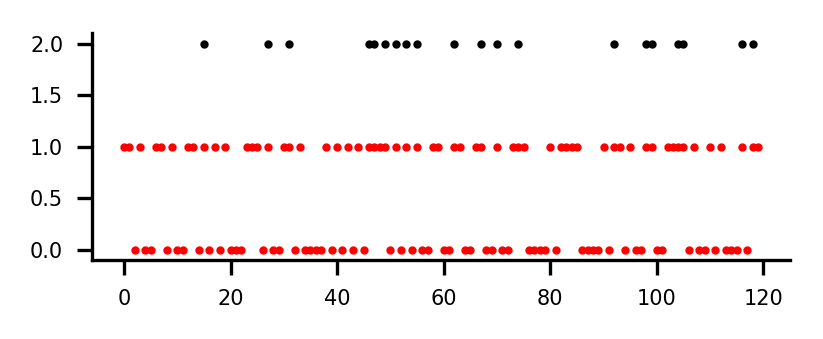

In [985]:
print(np.argsort(score_plot))
print(is_rewardt)

fig, ax = pl.subplots(1, 1, figsize=(3, 1))
t = np.arange(0, 120, 1)
ax.plot(t, is_rewardt, 'ro', lw=.1, zorder=10,ms=1)
ax.plot(np.argwhere(is_rewardt)[np.argsort(score_plot)[40:60]],np.ones([len(np.argsort(score_plot)[40:60]),1])*2,'ko',lw=.1, zorder=10,ms=1)


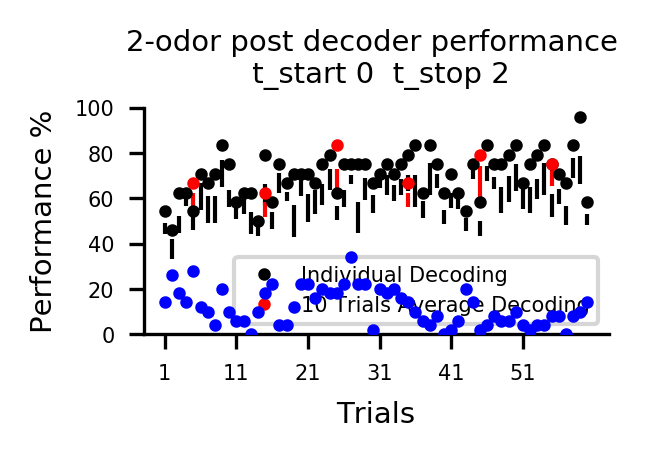

In [977]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

# Plot each trials decoding
t = np.arange(1, 61, 1)
ax.plot(t, score_plot*100, 'ko', lw=.5, zorder=19,ms=2)

# Plot ave trials decoding
t_ave = np.arange(10, 70, 10)
ax.plot(t_ave-np.diff(t_ave)[0]/2, score_ave_plot*100, 'ro', lw=.5, zorder=19,ms=2)

# Plot error bars
m = scores.mean(1)*100
s = np.std(scores, 1)*100 / np.sqrt(scores.shape[1]-1)
ax.errorbar(t, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)

m = scores_ave.mean(1)*100
s = np.std(scores_ave, 1)*100 / np.sqrt(scores_ave.shape[1]-1)
ax.errorbar(t_ave-np.diff(t_ave)[0]/2., m, s, lw=0, zorder=0, color= 'r', elinewidth=1)

# Nicer plots
ax.set_ylim(0, 100)
ax.set_xticks(np.arange(1, 61, 10))
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Trials')
ax.set_ylabel('Performance %')
ax.set_title('2-odor post decoder performance \n t_start '+ str(t_start0) +'  t_stop '+ str(t_stop0))
ax.legend(['Individual Decoding','10 Trials Average Decoding'])

ax.plot(t,licks_cs_tc[is_rewardt]*10,'bo', lw=.5, zorder=19,ms=2)

In [978]:
# POINT 1 (cont.): NEURAL DATA CAN LOOK VERY DIFFERENT FOR EACH TRIAL
#          BUT CLUSTERING ARE VERY CLEAR IN INDIVIDUAL TRIALS
#          This is more clearly shown by decoding with LINEAR SVM or LDA
#          Another piece of argument is:
# For each 10 trials in this block within 60 trials:
#     Average all neurons among 5 trials and test on all neurons on the rest 5 (averaged across trials as well).
#     The result shows that it is always around chance level. (Either normalized or nonmalized data do not work) 
#     This means that there are a lot of trial to trial variability.

from itertools import combinations
comb = combinations(range(0,10), 5)
combs = list(comb)

scores=[]
for i in range(6):
    scores_tmp = []
    # for every ten trials
    ind=np.arange(i*10,i*10+10,1)
    for j in combs:
        train_ind=ind[np.array(j)]
        test_ind=[x for x in ind if x not in train_ind]
        
        train_rewardt=np.mean(data_rewardt[:,train_ind,:],axis=1).T
        train_CSmt=np.mean(data_CSmt[:,train_ind,:],axis=1).T
        test_rewardt=np.mean(data_rewardt[:,test_ind,:],axis=1).T
        test_CSmt=np.mean(data_CSmt[:,test_ind,:],axis=1).T
        
        decodor.fit(np.r_[train_rewardt,train_CSmt], np.r_[np.ones(60),np.zeros(60)])
        scores_tmp.append(decodor.score(np.r_[test_rewardt,test_CSmt], np.r_[np.ones(60),np.zeros(60)]))
    scores.append(np.mean(scores_tmp))

In [979]:
scores

[0.51689814814814816,
 0.45396825396825397,
 0.51309523809523816,
 0.4321097883597883,
 0.52628968253968256,
 0.52453703703703702]

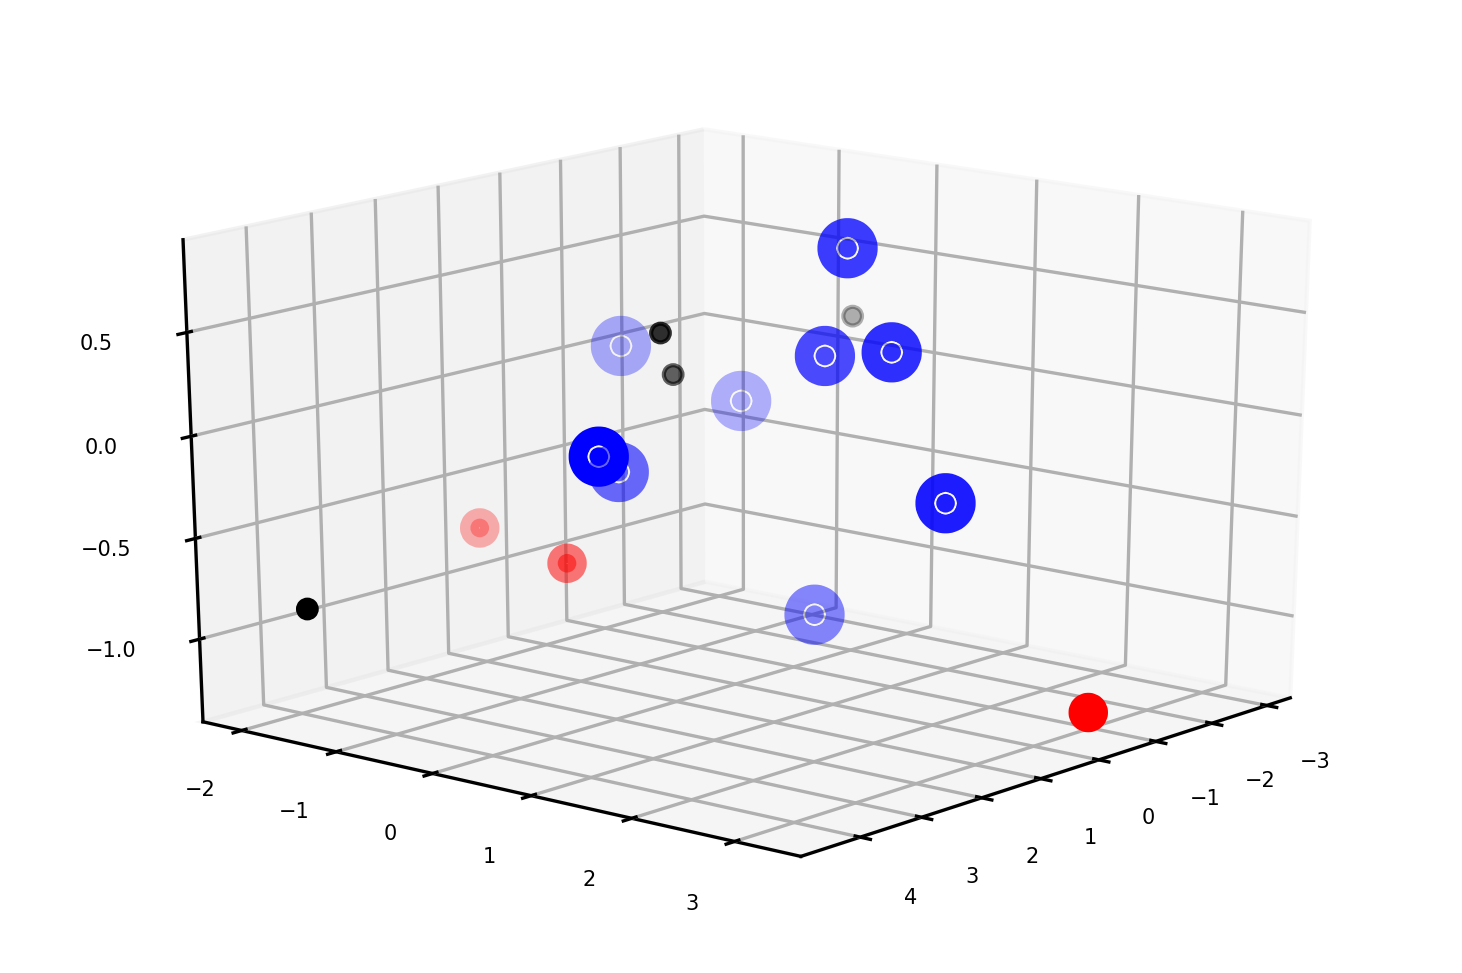

In [1681]:
#~~~~~~~~~~~~
#G
#PCA
#~~~~~~~~~~~~
from sklearn.decomposition import PCA
#fig = pl.figure(2)
#pl.imshow(data_rewardt[:,1,:].T,extent=[0, 1, 0, 1])

pca = PCA(whiten=True)
data_rewardt_reduced=pca.fit_transform(data_rewardt[:,51,:].T-np.mean(data_rewardt[:,51,:].T,axis=1,keepdims=True))
ax = pl.axes(projection='3d')
ax.scatter3D(data_rewardt_reduced[0,0:4], data_rewardt_reduced[1,0:4], data_rewardt_reduced[2,0:4],color='k', lw=1, label='reward')
ax.scatter3D(data_rewardt_reduced[0,4:7], data_rewardt_reduced[1,4:7], data_rewardt_reduced[2,4:7],color='r', lw=5, label='reward')
ax.scatter3D(data_rewardt_reduced[0,7:], data_rewardt_reduced[1,7:], data_rewardt_reduced[2,7:],color='b', lw=10, label='reward')
#pl.scatter(data_rewardt_reduced[0,10:20], data_rewardt_reduced[1,10:20],color='b', lw=1, label='reward')

data_rewardt_reduced=pca.fit_transform(data_rewardt[:,51,:].T-np.mean(data_rewardt[:,51,:].T,axis=1,keepdims=True))
#ax.scatter3D(data_rewardt_reduced[0,10:30], data_rewardt_reduced[1,10:30], data_rewardt_reduced[2,10:30],color='k', lw=5, label='reward')
#ax.scatter3D(data_rewardt_reduced[0,30:50], data_rewardt_reduced[1,30:50], data_rewardt_reduced[2,30:50],color='g', lw=10, label='reward')

ax.view_init(20,40)
pl.show()

In [1680]:
np.shape(data_rewardt_reduced)

(60, 16)

In [95]:
########### random doodles from below



folder = '/media/data/DATA1/data/odor_ass_learning_2019/results/c3m1/pre/notebooks/autorestore/decoding_odors/'
for var in ('labels',): 
    exec('%s = ut.load_variable(\'%s\', folder=\'%s\')'%(var, var, folder))

In [102]:
labels_tb = np.r_[[[l]*patterns_tb.shape[0] for l in labels]].T

In [115]:
(test_p,test_l)=zip(patterns_tb, labels_tb)[1]
which_trials = [True] * len(labels)

In [1334]:
np.shape(data_rewardt)

(50, 60, 60)

In [128]:
np.arange(120)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])